# Introduction to statistics with `R`

This is your first practice notebook in this course. 
The purpose of this notebook is to apply the commands and knowledge acquired through the lab and videos.
Some exercises might introduce new commands and packages to you.
The notebook will be incomplete for you to start writing the code to modify/produce output.

We will be working with wine dataset.
It has 6 independent variables and one dependent variable, `price`.

Look in the code samples for
```R
<what goes in here>
    or
<replace ... >
```
This is where you should be modifying the code before running it.

## Read in the Data

In [1]:
wine_data <- read.csv('/dsa/data/all_datasets/wine price/wine.csv')

#These are variables that were hypothesized to affect wine quality.  
#WinterRain - amount of winter rain (that year)
#AGST - average growing season temperature
#Age - age of the wine
#FrancePop - population of France (that year)

Now that the data is read in, how would you remove the `Id` column from the dataframe in `R`. Remember, `R` is very flexible so there are several ways to remove columns. Do the following:

**Activity 1**: Find the dimensions (the number of rows and columns) of the data frame. *Hint: You will have to look up the function to do this as it was not mentioned in the lab*. 

In [2]:
# Code for Activity 1 goes here 
# -----------------------
dim(wine_data)

[1] 25  7

Below is one of the ways that you can subset a data frame based on a condition. Run the code below to see what it returns.

In [3]:
head(wine_data[wine_data$Year > 1970,])

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
18,1971,7.1934,551,16.7667,112,12,52431.65
19,1972,6.2049,536,14.9833,158,11,52894.18
20,1973,6.6367,376,17.0667,123,10,53332.81
21,1974,6.2941,574,16.3000,184,9,53689.61
22,1975,7.2920,572,16.9500,171,8,53955.04
23,1976,7.1211,418,17.6500,247,7,54159.05


**Activity 2**: Subset the wine_data into two dataframes based on the year. Named these dataframes group1 and group2 where group 1 contains data for years less than or equal to 1960 and group2 contains data with year greater than 1960.

In [4]:
#2 Code for Activity 2 goes here 
# -----------------------
group1 = subset(wine_data[wine_data$Year < 1961,])
group2 = subset(wine_data[wine_data$Year > 1960,])

**Activity 3**: Run summary command and identify each variable if its continuous or discrete.

In [5]:
# Code for Activity 3 goes here 
# -----------------------
summary(wine_data)

      Year          Price         WinterRain         AGST        HarvestRain   
 Min.   :1952   Min.   :6.205   Min.   :376.0   Min.   :14.98   Min.   : 38.0  
 1st Qu.:1960   1st Qu.:6.519   1st Qu.:536.0   1st Qu.:16.20   1st Qu.: 89.0  
 Median :1966   Median :7.121   Median :600.0   Median :16.53   Median :130.0  
 Mean   :1966   Mean   :7.067   Mean   :605.3   Mean   :16.51   Mean   :148.6  
 3rd Qu.:1972   3rd Qu.:7.495   3rd Qu.:697.0   3rd Qu.:17.07   3rd Qu.:187.0  
 Max.   :1978   Max.   :8.494   Max.   :830.0   Max.   :17.65   Max.   :292.0  
      Age         FrancePop    
 Min.   : 5.0   Min.   :43184  
 1st Qu.:11.0   1st Qu.:46584  
 Median :17.0   Median :50255  
 Mean   :17.2   Mean   :49694  
 3rd Qu.:23.0   3rd Qu.:52894  
 Max.   :31.0   Max.   :54602  

**Activity 4**: *Find out the number of rows where the `Price` is greater than 7.

In [6]:
# Code for Activity 4 goes here 
# -----------------------
nrow(wine_data[wine_data$Price > 7.00,])

[1] 13

Let's say we want to know average Age of the wine. 

**Activity 5**: Apply mean() function on the Age variable

In [7]:
# Code for Activity 5 goes here  
# -----------------------
mean(wine_data$Age)

[1] 17.2

We want to know the year which has recorded highest price for the wine.

**Activity 6**: Find the maximum price that is recorded in wine dataset and year for the corresponding row. 
You will have to look up the command. 
Hint: try which(). 

In [8]:
?which

In [9]:
#' Code for Activity 6 goes here  
# -----------------------
wine_data$Year[which.max(wine_data$Price)]

[1] 1961

** Activity 7**: Identify the datatype of each variable in dataframe. You were introduced to this command in Intro to Data Science course or you can look up for this command.

In [10]:
# Code for Activity 7 goes here  
# -----------------------
sapply(wine_data,class)

Year       Price  WinterRain        AGST HarvestRain         Age 
  "integer"   "numeric"   "integer"   "numeric"   "integer"   "integer" 
  FrancePop 
  "numeric"

**Activity 8**: Check the structure of the dataframe. You have to look up for this command. This command will give you the dimensions of dataframe, type of each variable and initial first 10 values of the variable. Its a very useful command to get a quick overview of dataframe. 

In [11]:
# Code for Activity 8 goes here  
# -----------------------
str(wine_data)

'data.frame':	25 obs. of  7 variables:
 $ Year       : int  1952 1953 1955 1957 1958 1959 1960 1961 1962 1963 ...
 $ Price      : num  7.5 8.04 7.69 6.98 6.78 ...
 $ WinterRain : int  600 690 502 420 582 485 763 830 697 608 ...
 $ AGST       : num  17.1 16.7 17.1 16.1 16.4 ...
 $ HarvestRain: int  160 80 130 110 187 187 290 38 52 155 ...
 $ Age        : int  31 30 28 26 25 24 23 22 21 20 ...
 $ FrancePop  : num  43184 43495 44218 45152 45654 ...


Lets see how WinterRain variable data is distributed 

**Activity 9**: Plot the distribution of `WinterRain` variable using a histogram with bin size of 20. 
Plot a density curve on top of the histogram.

**Reference: ** http://ggplot2.tidyverse.org/reference/geom_histogram.html

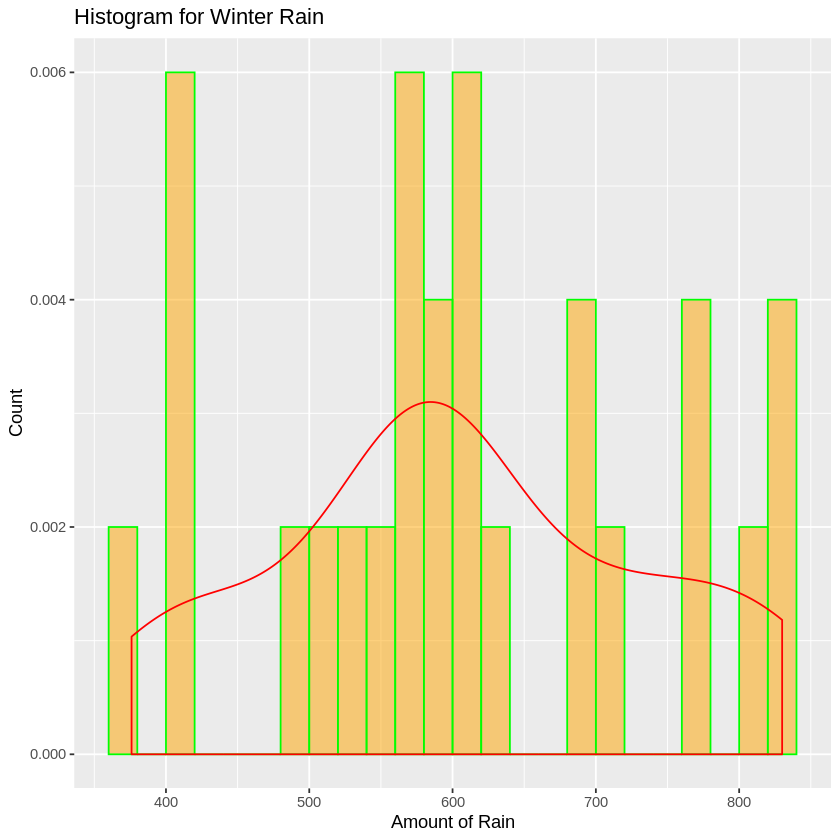

In [14]:
# Code for Activity 9 goes here  
# -----------------------

library(ggplot2)
ggplot(data=wine_data, aes(x=WinterRain)) + 
  geom_histogram(aes(y =..density..), 
                 breaks=seq(360, 850,by=20), 
                 col="green", 
                 fill="orange", 
                 alpha = .5) + 
  geom_density(col=2) + 
  labs(title="Histogram for Winter Rain") +
  labs(x="Amount of Rain", y="Count")

In [17]:
plot <- ggplot(data=wine_data, aes(x=WinterRain)) + 
  geom_histogram(aes(y =..density..), 
                 breaks=seq(360, 850,by=20), 
                 col="green", 
                 fill="orange", 
                 alpha = .5) + 
  geom_density(col=2) + 
  labs(title="Histogram for Winter Rain") +
  labs(x="Amount of Rain", y="Count")

**Activity 10: ** Draw vertical lines for mean and median of `WinterRain` in above plot.
You can use the same `plot` object to draw the lines.

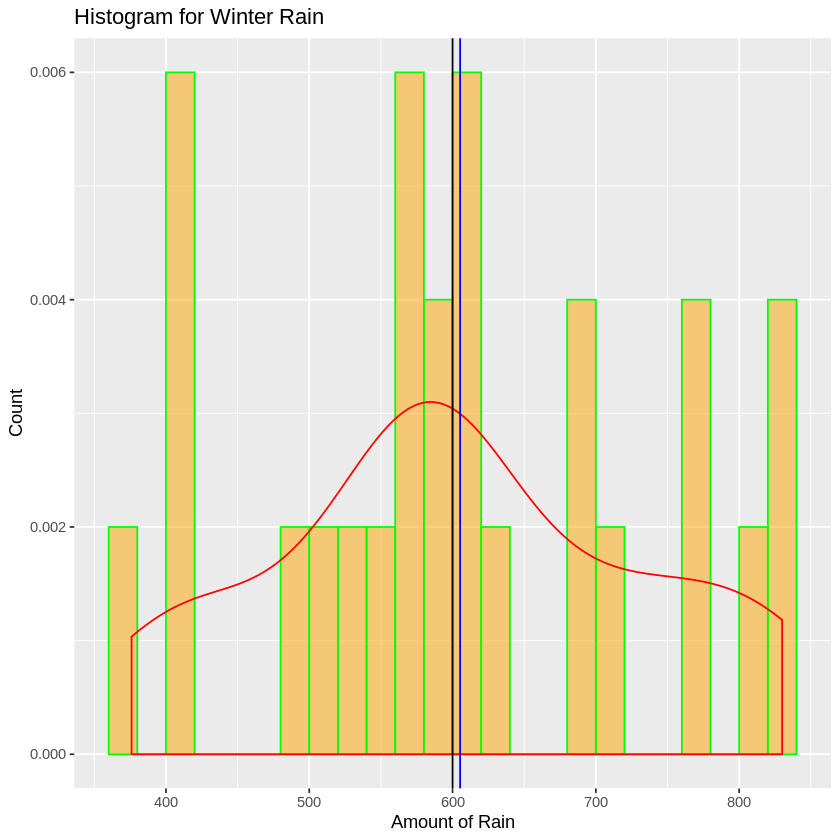

In [18]:
# Code for Activity 10 goes here  
# -----------------------
mean_WinterRain <- mean(wine_data$WinterRain)
median_WinterRain = median(wine_data$WinterRain)

plot + geom_vline(xintercept = mean_WinterRain,color='blue')+
       geom_vline(xintercept = median_WinterRain,color='black')

Is the `WinterRain` data skewed.

**Activity 11: ** Find the skewness of WinterRain variable.

In [21]:
# Code for Activity 11 goes here  
# -----------------------
install.packages('moments')
library(moments)
skewness(wine_data$WinterRain)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


[1] 0.08893585

# Save your notebook!